In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [ ]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.


In [ ]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

print(len(zmag_LRG_nocuts))

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
  
    
# zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.36

ra_LRG_temp = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
dec_LRG_temp = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG_temp = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
z_LRG_temp = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
gmag_LRG_temp = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG_temp = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG_temp = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG_temp = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG_temp = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + z_LRG_temp)**-1.)
# Mz = zmag_LRG_temp - DM_arr - K_correct
# Lz = 10.**((Mz-Msun_z)/(-2.5))
# log_Lz = np.log10(Lz)

ra_LRG = ra_LRG_temp #[np.where(log_Lz > 10.5)]
dec_LRG = dec_LRG_temp # [np.where(log_Lz > 10.5)]
id_LRG = id_LRG_temp # [np.where(log_Lz > 10.5)]
z_LRG = z_LRG_temp # [np.where(log_Lz > 10.5)]

# plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
# fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_temp # [np.where(log_Lz > 10.5)]
rmag_LRG = rmag_LRG_temp # [np.where(log_Lz > 10.5)]
zmag_LRG = zmag_LRG_temp # [np.where(log_Lz > 10.5)]
grcolor_LRG = grcolor_LRG_temp # [np.where(log_Lz > 10.5)]
rzcolor_LRG = rzcolor_LRG_temp# [np.where(log_Lz > 10.5)]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(ra_BKG))
print(len(ra))

In [2]:
# save LRG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz', ra_LRG=ra_LRG)
# print(ra_LRG.shape)
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz', dec_LRG=dec_LRG)
# print(dec_LRG.shape)
data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz', z_LRG=z_LRG)
# print(z_LRG.shape)
data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz', gmag_LRG=gmag_LRG)
# print(gmag_LRG.shape)
data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz', rmag_LRG=rmag_LRG)
# print(rmag_LRG.shape)
data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz', zmag_LRG=zmag_LRG)
# print(zmag_LRG.shape)
data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz', grcolor_LRG=grcolor_LRG)
# print(grcolor_LRG.shape)
data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz', rzcolor_LRG=rzcolor_LRG)
# print(rzcolor_LRG.shape)
data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)


In [3]:
# save BKG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz', ra_BKG=ra_BKG)
# print(ra_BKG.shape)
data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz', dec_BKG=dec_BKG)
# print(dec_BKG.shape)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz', gmag_BKG=gmag_BKG)
# print(gmag_BKG.shape)
data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz', rmag_BKG=rmag_BKG)
# print(rmag_BKG.shape)
data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz', zmag_BKG=zmag_BKG)
# print(zmag_BKG.shape)
data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz', grcolor_BKG=grcolor_BKG)
# print(grcolor_BKG.shape)
data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz', rzcolor_BKG=rzcolor_BKG)
# print(rzcolor_BKG.shape)
data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)


In [4]:
# save combined LRG and BKG lists

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# print(ra.shape)
data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
print(ra_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# print(dec.shape)
data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
print(dec_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# print(gmag.shape)
data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
print(gmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# print(rmag.shape)
data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
print(rmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# print(zmag.shape)
data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
print(zmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# print(grcolor.shape)
data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
print(grcolor_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# print(rzcolor.shape)
data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
print(rzcolor_total.shape)

print(rzcolor_total[0:10])
print(rzcolor_total[0])
print(rzcolor_total[5])

(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
[0.75320435 1.3548889  1.1859646  0.8234596  0.9435139  1.1689548
 0.8595371  0.9884472  1.2700977  1.3163471 ]
0.75320435
1.1689548


In [101]:
total_index_arr = range(0, len(ra_total))
print(len(ra_total))
print(len(total_index_arr))

# index_lowz = np.random.randint(0, len(ra_total), size=5000)
# index_lowz = np.random.choice(total_index_arr, size=5000, replace=False)
# np.savez('/Users/mtownsend/Documents/LRG_Data/index_lowz.npz', index_lowz=index_lowz)
data_index_lowz = np.load('/Users/mtownsend/Documents/LRG_Data/index_lowz.npz')
index_lowz = data_index_lowz['index_lowz']
print(index_lowz)

# index_midz1 = np.random.randint(0, len(ra_total), size=5000)
index_midz1 = np.random.choice(total_index_arr, size=5000, replace=False)
np.savez('/Users/mtownsend/Documents/LRG_Data/index_midz1.npz', index_midz1=index_midz1)
data_index_midz1 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz1.npz')
index_midz1 = data_index_midz1['index_midz1']
print(index_midz1)

# index_midz2 = np.random.randint(0, len(ra_total), size=5000)
index_midz2 = np.random.choice(total_index_arr, size=5000, replace=False)
np.savez('/Users/mtownsend/Documents/LRG_Data/index_midz2.npz', index_midz2=index_midz2)
data_index_midz2 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz2.npz')
index_midz2 = data_index_midz2['index_midz2']
print(index_midz2)

# index_midz3 = np.random.randint(0, len(ra_total), size=5000)
index_midz3 = np.random.choice(total_index_arr, size=5000, replace=False)
np.savez('/Users/mtownsend/Documents/LRG_Data/index_midz3.npz', index_midz3=index_midz3)
data_index_midz3 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz3.npz')
index_midz3 = data_index_midz3['index_midz3']
print(index_midz3)

# index_highz = np.random.randint(0, len(ra_total), size=5000)
index_highz = np.random.choice(total_index_arr, size=5000, replace=False)
np.savez('/Users/mtownsend/Documents/LRG_Data/index_highz.npz', index_highz=index_highz)
data_index_highz = np.load('/Users/mtownsend/Documents/LRG_Data/index_highz.npz')
index_highz = data_index_highz['index_highz']
print(index_highz)

519348
519348
[ 65197 426408 117669 ... 159522 449206  94330]
[234297 291919 433679 ...  83417 246046 428425]
[256190 464126 182923 ... 376404 131772 299287]
[154348  83296  43124 ...  70194   4939 470802]
[218182 500265 239433 ... 241240 144182 167813]


In [14]:
# test_ra = [0,1,2,3,4,5,6,7,8,9]
# print(test_ra)
# index = [2,3,7,2]
# test_ra = np.delete(test_ra, index)
# print(test_ra)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 4 5 6 8 9]


In [103]:
# make a random data set that I will treat as LRGs
random_raLRG = ra_total[index_highz]
random_decLRG = dec_total[index_highz]
random_gmagLRG = gmag_total[index_highz]
random_rmagLRG = rmag_total[index_highz]
random_zmagLRG = zmag_total[index_highz]
random_grcolorLRG = grcolor_total[index_highz]
random_rzcolorLRG = rzcolor_total[index_highz]

# eliminate "LRGs" from background catalog
random_raBKG = np.delete(ra_total, index_highz)
random_decBKG = np.delete(dec_total, index_highz)
random_gmagBKG = np.delete(gmag_total, index_highz)
random_rmagBKG = np.delete(rmag_total, index_highz)
random_zmagBKG = np.delete(zmag_total, index_highz)
random_grcolorBKG = np.delete(grcolor_total, index_highz)
random_rzcolorBKG = np.delete(rzcolor_total, index_highz)

print(len(random_raLRG))
print(len(random_raBKG))
print(len(ra_total))
print(len(random_raLRG) + len(random_raBKG))

5000
514348
519348
519348


In [104]:
# assign random LRGs to a redshift bin
# random_z_low = np.random.choice(zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.3))], size=5000, replace=True)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_z_low.npz', random_z_low=random_z_low)
data_random_z_low = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_low.npz')
random_z_low = data_random_z_low['random_z_low']
print(len(random_z_low))
print(random_z_low[0:30])

# random_z_mid1 = np.random.choice(zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.4))], size=5000, replace=True)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_z_mid1.npz', random_z_mid1=random_z_mid1)
data_random_z_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid1.npz')
random_z_mid1 = data_random_z_mid1['random_z_mid1']
print(len(random_z_mid1))
print(random_z_mid1[0:30])

# random_z_mid2 = np.random.choice(zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.5))], size=5000, replace=True)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_z_mid2.npz', random_z_mid2=random_z_mid2)
data_random_z_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid2.npz')
random_z_mid2 = data_random_z_mid2['random_z_mid2']
print(len(random_z_mid2))
print(random_z_mid2[0:30])

# random_z_mid3 = np.random.choice(zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.6))], size=5000, replace=True)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_z_mid3.npz', random_z_mid3=random_z_mid3)
data_random_z_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid3.npz')
random_z_mid3 = data_random_z_mid3['random_z_mid3']
print(len(random_z_mid3))
print(random_z_mid3[0:30])

# random_z_high = np.random.choice(zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.65))], size=5000, replace=True)
# np.savez('/Users/mtownsend/Documents/LRG_Data/random_z_high.npz', random_z_high=random_z_high)
data_random_z_high = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_high.npz')
random_z_high = data_random_z_high['random_z_high']
print(len(random_z_high))
print(random_z_high[0:30])

print(len(random_z_high[np.where((random_z_high >=0.2) & (random_z_high < 0.25))]))
print(len(random_z_high[np.where((random_z_high >=0.25) & (random_z_high < 0.3))]))
print(len(random_z_high[np.where((random_z_high >=0.3) & (random_z_high < 0.35))]))
print(len(random_z_high[np.where((random_z_high >=0.35) & (random_z_high < 0.4))]))
print(len(random_z_high[np.where((random_z_high >=0.4) & (random_z_high < 0.45))]))
print(len(random_z_high[np.where((random_z_high >=0.45) & (random_z_high < 0.5))]))
print(len(random_z_high[np.where((random_z_high >=0.5) & (random_z_high < 0.55))]))
print(len(random_z_high[np.where((random_z_high >=0.55) & (random_z_high < 0.6))]))
print(len(random_z_high[np.where((random_z_high >=0.6) & (random_z_high < 0.65))]))


5000
[0.2536089  0.22874898 0.22249597 0.22700822 0.28763494 0.294158
 0.24207038 0.2364694  0.28930146 0.21666305 0.25213313 0.22714157
 0.24067542 0.22741453 0.2917443  0.22874898 0.28326628 0.20705718
 0.2121528  0.21638943 0.2762927  0.2349638  0.23147915 0.28925303
 0.20216194 0.27786887 0.27765113 0.22886997 0.28225613 0.2648791 ]
5000
[0.20054579 0.30874568 0.27931136 0.29813436 0.3769578  0.33955306
 0.31118086 0.33261117 0.39633664 0.26198933 0.22714157 0.28751785
 0.24345736 0.35837948 0.2535086  0.29946494 0.32684374 0.25213313
 0.37993786 0.28637275 0.38112733 0.35883588 0.33897987 0.28346226
 0.32204965 0.21417594 0.36829904 0.34959897 0.32409245 0.3551971 ]
5000
[0.25778228 0.4076654  0.48583505 0.32883874 0.24457863 0.4913908
 0.44759962 0.44786978 0.4392457  0.24129923 0.35501447 0.4747828
 0.41966248 0.28060648 0.4574777  0.32912305 0.32071343 0.3916075
 0.4890965  0.38082874 0.33535093 0.32013577 0.47264746 0.32883874
 0.4841502  0.44427603 0.3418558  0.47572288 0.335

In [105]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(random_z_high)

print("end cosmoCalc")


end cosmoCalc


In [106]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

# rzinit = -1.8027077
# rzfin = 10.44729232788086
# rz_interval = 0.5
# rz_num = (rzfin-rzinit)/rz_interval
# rz_edges, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# print(len(rz_edges))

# grinit = -6.5846786
# grfin = 10.56532135009765
# gr_interval = 0.5
# gr_num = (grfin-grinit)/gr_interval
# gr_edges, step = np.linspace(grinit, grfin, num=int(gr_num), retstep=True)
# print(len(gr_edges))

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((rzcolor_total, grcolor_total, zmag_total), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


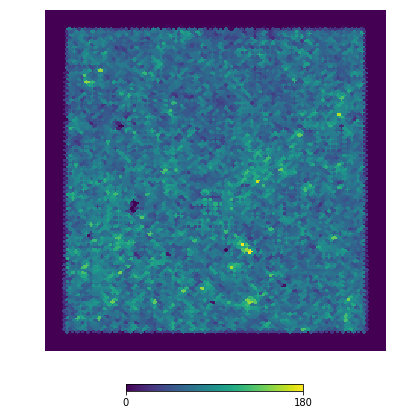

length phi:  519348


In [107]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total)):
    theta.append(np.radians(90. - dec_total[i]))
    phi.append(np.radians(ra_total[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [108]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)

print('end nearNeighbor')



end nearNeighbor


In [112]:
# divvy up by redshift

near_arr = np.array(near)
index_arr = np.array(index)

# high_near25 = near_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
# high_near03 = near_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
# high_near35 = near_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
# high_near04 = near_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
# high_near45 = near_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
# high_near05 = near_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
# high_near55 = near_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
# high_near06 = near_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
# high_near65 = near_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]

# high_nearindex25 = index_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
# high_nearindex03 = index_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
# high_nearindex35 = index_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
# high_nearindex04 = index_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
# high_nearindex45 = index_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
# high_nearindex05 = index_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
# high_nearindex55 = index_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
# high_nearindex06 = index_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
# high_nearindex65 = index_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]

# print(len(near))
# print(len(low_near25))
# print(len(low_near03))

# print(len(index_arr))
# print(len(low_nearindex25))
# print(len(low_nearindex03))


# save near arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/near_null_high.npz', near_total=near_arr, high_near25=high_near25, high_near03=high_near03, high_near35=high_near35, high_near04=high_near04, high_near45=high_near45, high_near05=high_near05, high_near55=high_near55, high_near06=high_near06, high_near65=high_near65)
null_near = np.load('/Users/mtownsend/Documents/LRG_Data/near_null_high.npz')
near_total = null_near['near_total']
high_near25 = null_near['high_near25']
high_near03 = null_near['high_near03']
high_near35 = null_near['high_near35']
high_near04 = null_near['high_near04']
high_near45 = null_near['high_near45']
high_near05 = null_near['high_near05']
high_near55 = null_near['high_near55']
high_near06 = null_near['high_near06']
high_near65 = null_near['high_near65']
print(near_total.shape)
print(high_near25.shape)
print(high_near03.shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/near_index_null_high.npz', near_index_total=index_arr, high_nearindex25=high_nearindex25, high_nearindex03=high_nearindex03, high_nearindex35=high_nearindex35, high_nearindex04=high_nearindex04, high_nearindex45=high_nearindex45, high_nearindex05=high_nearindex05, high_nearindex55=high_nearindex55, high_nearindex06=high_nearindex06, high_nearindex65=high_nearindex65)
null_near_index = np.load('/Users/mtownsend/Documents/LRG_Data/near_index_null_high.npz')
near_total = null_near_index['near_index_total']
high_near_index25 = null_near_index['high_nearindex25']
high_near_index03 = null_near_index['high_nearindex03']
high_near_index35 = null_near_index['high_nearindex35']
high_near_index04 = null_near_index['high_nearindex04']
high_near_index45 = null_near_index['high_nearindex45']
high_near_index05 = null_near_index['high_nearindex05']
high_near_index55 = null_near_index['high_nearindex55']
high_near_index06 = null_near_index['high_nearindex06']
high_near_index65 = null_near_index['high_nearindex65']
print(near_total.shape)
print(high_near_index25.shape)
print(high_near_index03.shape)


# print(np.asarray(near).shape)
# print(index[0])
# print(len(index[0]))

(5000, 49, 49, 49)
(228, 49, 49, 49)
(233, 49, 49, 49)
(5000,)
(228,)
(233,)


In [124]:
# testing algorithm to insert satellites into near arrays

# print(index[0])
# print(random_z_low[0])

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/highz_medzmag-9matrices.npz')
medzmag = data_zmag['medzmag_low']
print(medzmag.shape)
medzmag0 = medzmag[0]
medzmag1 = medzmag[1]
medzmag2 = medzmag[2]
medzmag3 = medzmag[3]
medzmag4 = medzmag[4]
medzmag5 = medzmag[5]
medzmag6 = medzmag[6]
medzmag7 = medzmag[7]
medzmag8 = medzmag[8]

rzcolor = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor = np.concatenate([random_grcolorLRG, random_grcolorBKG])
zmag = np.concatenate([random_zmagLRG, random_zmagBKG])

# test_index = low_near_index25[0:2]
# print(len(test_index))

# rz = rzcolor_total[index[0]]
# print(len(rz))
# gr = grcolor_total[index[0]]
# print(len(gr))
# zmag = zmag_total[index[0]]
# print(len(zmag))


# import numpy as np

# candidate_index = []

# # This loop finds the galaxies in color-color cells that meet the critera of median_zmag in those cells
# for i in range(len(rz_edges) - 1):
#     for j in range(len(gr_edges) - 1):
#         for m in range(len(rz)):
#             if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (zmag[m] <= medzmag0[i][j])):
#                 candidate_index.append(m)

# print(candidate_index)
# print(zmag[14])
# print(zmag[4])
# # print(medzmag0[np.where(medzmag0 > 0.)]) 

# # draw number of from gaussian
# N = np.random.normal(loc=1., scale=1., size=1)
# print(N) 
# num = round(float(N))
# print(type(num))
# print(num)
 
# a = np.random.choice(candidate_index, size=int(num), replace=True)
# print(a)
# print(rz[a])
# print(gr[a])
# print(zmag[a])
# new_rz = np.concatenate((rz,rz[a]))
# print(new_rz)
# print(len(new_rz))
# new_gr = np.concatenate((gr,gr[a]))
# print(new_gr)
# print(len(new_gr))
# new_zmag = np.concatenate((zmag,zmag[a]))
# print(new_zmag)
# print(len(new_zmag))



def adding_sats(medzmag, index, rzcolor_total, grcolor_total, zmag_total, rz_edges, gr_edges):
    
    import numpy as np
    
    rz = rzcolor_total[index]
    gr = grcolor_total[index]
    zmag = zmag_total[index]

    candidate_index = []

    # This loop finds the galaxies in color-color cells that meet the critera of median_zmag in those cells
    for i in range(len(rz_edges) - 1):
        for j in range(len(gr_edges) - 1):
            for m in range(len(rz)):
                if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (zmag[m] <= medzmag[i][j])):
                    candidate_index.append(m)
#     print('candidate index: ', candidate_index)
    # draw number of from gaussian
#      N = np.random.normal(loc=1., scale=1., size=1)
    N = np.random.poisson(lam=3, size=1)
#     print(N)
    num = round(float(N))
#     print(num)
#     a = np.random.choice(candidate_index, size=int(num), replace=True)
    if (len(candidate_index) > 0.):
        a = np.random.choice(candidate_index, size=int(num), replace=True)
        new_rz = np.concatenate((rz,rz[a]))
        new_gr = np.concatenate((gr,gr[a]))
        new_zmag = np.concatenate((zmag,zmag[a]))
    else:
        new_rz = rz
        new_gr = gr
        new_zmag = zmag
    
    return new_rz, new_gr, new_zmag
    

(9, 49, 49)


In [125]:
new_rz = []
new_gr = []
new_zmag = []

for i in range(len(high_near_index25)):
    temp_rz, temp_gr, temp_zmag = adding_sats(medzmag0, high_near_index25[i], rzcolor, grcolor, zmag, rz_edges, gr_edges)
    print(i)
    new_rz.append(temp_rz)
    new_gr.append(temp_gr)
    new_zmag.append(temp_zmag)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227


In [127]:
print(len(new_rz))

# create new 3D histograms with new_rz, new_gr, and new_zmag
high_near25_mod3 = []
for i in range(len(new_rz)):
    if len(new_rz[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        # hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
        high_near25_mod3.append(hist3d)
    else:

        # hist2d, x_notuse, y_notuse = np.histogram2d(mag[index1[i]], color[index1[i]], bins=(xedges, yedges), normed=False)
        # hist3d, edges_nouse = np.histogramdd((color1[index[i]], mag[index[i]], color2[index[i]]), bins=(edges[0], edges[1], edges[2]),
        #                                             density=False)
        hist3d, edges_nouse = np.histogramdd((new_rz[i], new_gr[i], new_zmag[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        high_near25_mod3.append(hist3d)
        
print(len(high_near25_mod3))
print(np.asarray(high_near25_mod3).shape)
        

228
228
(228, 49, 49, 49)


mean number of near neighbors is 98.80263157894737
median number of near neighbors is 94.0
standard deviation of near neighbor is 24.029780355883098
standard error is 1.5949125394826682


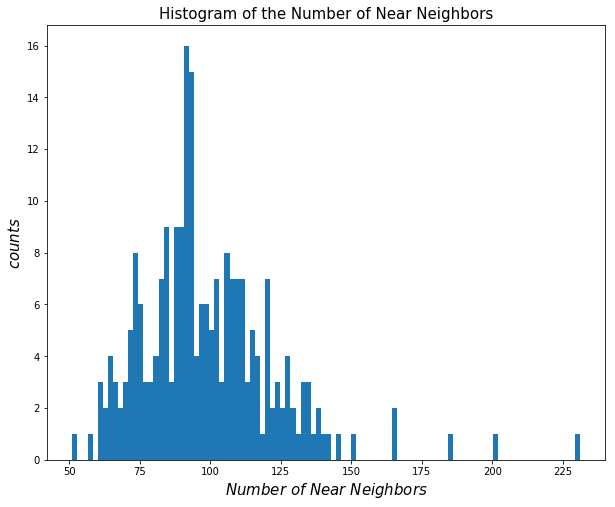

mean number of near neighbors is 98.77631578947368
median number of near neighbors is 94.0
standard deviation of near neighbor is 23.99374846442217
standard error is 1.5925210188503025


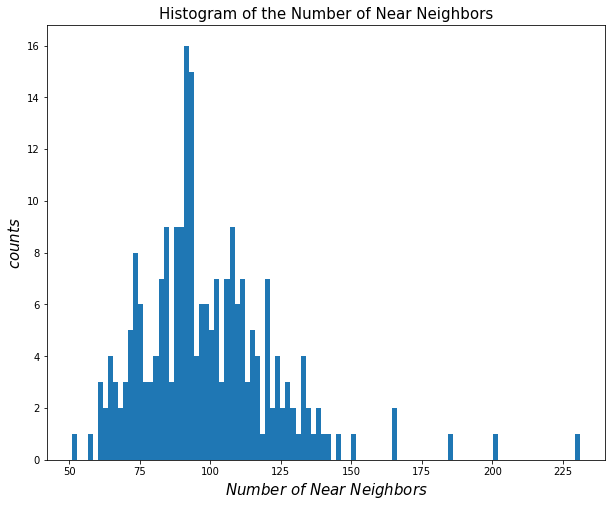

mean number of near neighbors is 98.8157894736842
median number of near neighbors is 94.0
standard deviation of near neighbor is 24.01865714488214
standard error is 1.59417426603855


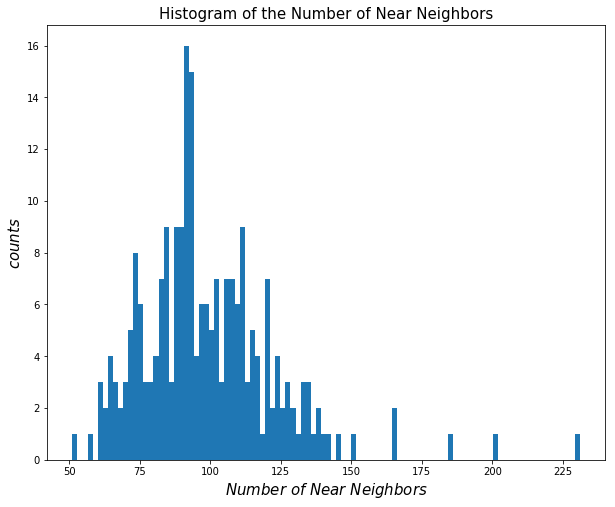

mean number of near neighbors is 98.75877192982456
median number of near neighbors is 94.0
standard deviation of near neighbor is 23.983339653767654
standard error is 1.5918301618225594


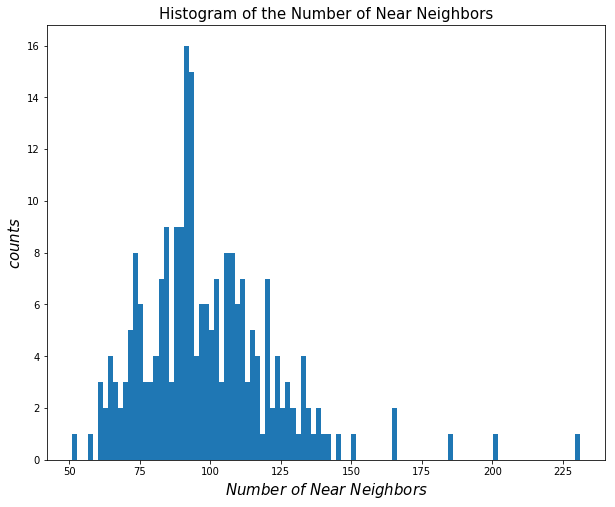

In [129]:
totalNear(high_near25_mod1)

plt.show()

totalNear(high_near25_mod2)

plt.show()

totalNear(high_near25_mod3)

plt.show()

totalNear(high_near25)

plt.show()

# np.savez('/Users/mtownsend/Documents/LRG_Data/near_models_high.npz', high_near25_mod1=high_near25_mod1, high_near25_mod2=high_near25_mod2, high_near25_mod3=high_near25_mod3)
# near_models_high = np.load('/Users/mtownsend/Documents/LRG_Data/near_models_high.npz')
# near25_mod1 = near_models_high['high_near25_mod1']
# near25_mod2 = near_models_high['high_near25_mod2']
# near25_mod3 = near_models_high['high_near25_mod3']


In [130]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])
zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, random_raLRG, random_decLRG, pixnums, zmag_tot, rzcolor_tot, grcolor_tot, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


In [132]:
Nbkg_arr = np.array(Nbkg)

high_Nbkg25 = Nbkg_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
high_Nbkg03 = Nbkg_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
high_Nbkg35 = Nbkg_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
high_Nbkg04 = Nbkg_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
high_Nbkg45 = Nbkg_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
high_Nbkg05 = Nbkg_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
high_Nbkg55 = Nbkg_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
high_Nbkg06 = Nbkg_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
high_Nbkg65 = Nbkg_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]

np.savez('/Users/mtownsend/Documents/LRG_Data/Nbkg_null_high.npz', Nbkg_total=Nbkg_arr, high_Nbkg25=high_Nbkg25, high_Nbkg03=high_Nbkg03, high_Nbkg35=high_Nbkg35, high_Nbkg04=high_Nbkg04, high_Nbkg45=high_Nbkg45, high_Nbkg05=high_Nbkg05, high_Nbkg55=high_Nbkg55, high_Nbkg06=high_Nbkg06, high_Nbkg65=high_Nbkg65)
null_Nbkg = np.load('/Users/mtownsend/Documents/LRG_Data/Nbkg_null_high.npz')
Nbkg_total = null_Nbkg['Nbkg_total']
high_Nbkg25 = null_Nbkg['high_Nbkg25']
high_Nbkg03 = null_Nbkg['high_Nbkg03']
high_Nbkg35 = null_Nbkg['high_Nbkg35']
high_Nbkg04 = null_Nbkg['high_Nbkg04']
high_Nbkg45 = null_Nbkg['high_Nbkg45']
high_Nbkg05 = null_Nbkg['high_Nbkg05']
high_Nbkg55 = null_Nbkg['high_Nbkg55']
high_Nbkg06 = null_Nbkg['high_Nbkg06']
high_Nbkg65 = null_Nbkg['high_Nbkg65']
print(Nbkg_total.shape)
print(high_Nbkg25.shape)
print(high_Nbkg03.shape)


(5000, 49, 49, 49)
(228, 49, 49, 49)
(233, 49, 49, 49)


In [17]:
# totalNbkg(Nbkg)

# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nbkg_random_hist.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nbkg_hist.pdf')

# plt.show()

Nbkg = np.array(Nbkg)


# save bkg arrays

np.savez('/Users/mtownsend/Documents/LRG_Data/bkg_null.npz', null_bkg=Nbkg)
null_bkg = np.load('/Users/mtownsend/Documents/LRG_Data/bkg_null.npz')
bkg_null = null_bkg['null_bkg']
print(np.asarray(bkg_null).shape)

(5000, 49, 49, 49)


In [136]:
# Nsat = np.array(near) - np.array(Nbkg)
high_nullNsat25 = high_near25 - high_Nbkg25
high_Nsat25_mod1 = high_near25_mod1 - high_Nbkg25
high_Nsat25_mod2 = high_near25_mod2 - high_Nbkg25
high_Nsat25_mod3 = high_near25_mod3 - high_Nbkg25

np.savez('/Users/mtownsend/Documents/LRG_Data/Nsat25_null.npz', high_nullNsat25=high_nullNsat25)
np.savez('/Users/mtownsend/Documents/LRG_Data/Nsat_models.npz', high_Nsat25_mod1=high_Nsat25_mod1, high_Nsat25_mod2=high_Nsat25_mod2, high_Nsat25_mod3=high_Nsat25_mod3)
data_Nsat_models = np.load('/Users/mtownsend/Documents/LRG_Data/Nsat_models.npz')
Nsat_mod1 = data_Nsat_models['high_Nsat25_mod1']
Nsat_mod2 = data_Nsat_models['high_Nsat25_mod2']
Nsat_mod3 = data_Nsat_models['high_Nsat25_mod2']

print("end Nsat")

end Nsat


In [ ]:
from lrg_plot_functions import *

totalNsat(Nsat)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nsat_random_hist.pdf')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nsat_hist.pdf')

plt.show()


# totalNsat(null_Nsat_new)
# plt.show()

In [ ]:
# totalNsat(null_Nsat_new)
# plt.show()

In [ ]:
# read in selection matrices for each luminosity selected sample 

data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
smatrix03 = data_smatrix03['smatrix_low']
print(smatrix03.shape)

data_smatrix04 = np.load('/Users/mtownsend/Desktop/midz1_smatrix-4matrices.npz')
smatrix04 = data_smatrix04['smatrix_low']
print(smatrix04.shape)

data_smatrix05 = np.load('/Users/mtownsend/Desktop/midz2_smatrix-6matrices.npz')
smatrix05 = data_smatrix05['smatrix_low']
print(smatrix05.shape)

data_smatrix06 = np.load('/Users/mtownsend/Desktop/midz3_smatrix-8matrices.npz')
smatrix06 = data_smatrix06['smatrix_low']
print(smatrix06.shape)

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)


In [ ]:
# smatrix0 = smatrix03[0]
# print(smatrix0.shape)
# smatrix1 = smatrix03[1]
# print(smatrix1.shape)

# result0 = np.argwhere(smatrix0 == 1)
# result1 = np.argwhere(smatrix1 == 1)

# print(len(result0))
# print('----')
# print(len(result1))


In [ ]:
# gauss2 = np.random.normal(loc=2., scale=1., size=1)
# print(int(gauss2))

# gauss3 = np.random.normal(loc=3., scale=1., size=1)
# print(int(gauss3))

# gauss4 = np.random.normal(loc=4., scale=1., size=1)
# print(int(gauss4))

# gauss5 = np.random.normal(loc=5., scale=1., size=1)
# print(int(gauss5))

In [ ]:
# index0 = np.random.randint(0,len(result0),size=int(gauss2))
# print(index0)
# print(result0[index0])

In [ ]:
Nsat25 = Nsat[np.where((random_z_low >= 0.2) & (random_z_low < 0.25))]
Nsat03 = Nsat[np.where((random_z_low >= 0.25) & (random_z_low < 0.3))]
# Nsat35 = Nsat[np.where((random_z_mid2 >= 0.3) & (random_z_mid2 < 0.35))]
# Nsat04 = Nsat[np.where((random_z_mid2 >= 0.35) & (random_z_mid2 < 0.4))]
# Nsat45 = Nsat[np.where((random_z_mid2 >= 0.4) & (random_z_mid2 < 0.45))]
# Nsat05 = Nsat[np.where((random_z_mid2 >= 0.45) & (random_z_mid2 < 0.5))]
# Nsat55 = Nsat[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
# Nsat06 = Nsat[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
# Nsat65 = Nsat[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]

print(Nsat25.shape)
print(Nsat03.shape)

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_mid2.npz', Nsat25=Nsat25)
# print(np.asarray(Nsat25).shape)
# data_Nsat25 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat25_mid2.npz')
# null_Nsat_new25 = data_Nsat25['Nsat25']
# print(null_Nsat_new25.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_mid2.npz', Nsat03=Nsat03)
# print(np.asarray(Nsat03).shape)
# data_Nsat03 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat03_mid2.npz')
# null_Nsat_new03 = data_Nsat03['Nsat03']
# print(null_Nsat_new03.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_mid2.npz', Nsat35=Nsat35)
# print(np.asarray(Nsat35).shape)
# data_Nsat35 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat35_mid2.npz')
# null_Nsat_new35 = data_Nsat35['Nsat35']
# print(null_Nsat_new35.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_mid2.npz', Nsat04=Nsat04)
# print(np.asarray(Nsat04).shape)
# data_Nsat04 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat04_mid2.npz')
# null_Nsat_new04 = data_Nsat04['Nsat04']
# print(null_Nsat_new04.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat45_mid2.npz', Nsat45=Nsat45)
# print(np.asarray(Nsat45).shape)
# data_Nsat45 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat45_mid2.npz')
# null_Nsat_new45 = data_Nsat45['Nsat45']
# print(null_Nsat_new45.shape)

# print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_Nsat05_mid2.npz', Nsat05=Nsat05)
# print(np.asarray(Nsat05).shape)
# data_Nsat05 = np.load('/Users/mtownsend/Documents/LRG_Data/null_Nsat05_mid2.npz')
# null_Nsat_new05 = data_Nsat05['Nsat05']
# print(null_Nsat_new05.shape)

# print('----')

# np.savez('/Users/mtownsend/anaconda/Data/null_Nsat55_high.npz', Nsat55=Nsat55)
# print(np.asarray(Nsat55).shape)
# data_Nsat55 = np.load('/Users/mtownsend/anaconda/Data/null_Nsat55_high.npz')
# null_Nsat_new55 = data_Nsat55['Nsat55']
# print(null_Nsat_new55.shape)

# print('----')

# np.savez('/Users/mtownsend/anaconda/Data/null_Nsat06_high.npz', Nsat06=Nsat06)
# print(np.asarray(Nsat06).shape)
# data_Nsat06 = np.load('/Users/mtownsend/anaconda/Data/null_Nsat06_high.npz')
# null_Nsat_new06 = data_Nsat06['Nsat06']
# print(null_Nsat_new06.shape)

# print('----')

# np.savez('/Users/mtownsend/anaconda/Data/null_Nsat65_high.npz', Nsat65=Nsat65)
# print(np.asarray(Nsat65).shape)
# data_Nsat65 = np.load('/Users/mtownsend/anaconda/Data/null_Nsat65_high.npz')
# null_Nsat_new65 = data_Nsat65['Nsat65']
# print(null_Nsat_new65.shape)




# print(len(Nsat))

# print(len(Nsat25))
# print(len(Nsat03))
# print(len(Nsat35))
# print(len(Nsat04))

zinit = 0.2
zfin = 0.65
interval = 0.05
# num = (zfin-zinit)/interval
num = 10. 
zrange, step = np.linspace(zinit, zfin, num=int(num), retstep=True)

In [ ]:
# print(Nsat25[0,0,0,0])
print(Nsat25[0,9,23,18])
Nsat25[0,9,23,18] = Nsat25[0,9,23,28] + 1.
print(Nsat25[0,9,23,18])

In [ ]:
# make new Nsat for log(lum)=9.55; 0.2 < z < 0.3

# 0.2 < z < 0.25
lowz_newNsat25 = []
for i in range(len(Nsat25)):
    lowz_newNsat25.append(Nsat25[i] * smatrix03[0])
    
# 0.25 < z < 0.3
lowz_newNsat03 = []
for i in range(len(Nsat03)):
    lowz_newNsat03.append(Nsat03[i] * smatrix03[1])

print(np.asarray(lowz_newNsat25).shape)
print(np.asarray(lowz_newNsat03).shape)

In [ ]:
# # make new Nsat for log(lum)=9.84; 0.2 < z < 0.4

# # 0.2 < z < 0.25
# midz1_newNsat25 = []
# for i in range(len(Nsat25)):
#     midz1_newNsat25.append(Nsat25[i] * smatrix04[0])
    
# # 0.25 < z < 0.3
# midz1_newNsat03 = []
# for i in range(len(Nsat03)):
#     midz1_newNsat03.append(Nsat03[i] * smatrix04[1])
    
# # 0.3 < z < 0.35
# midz1_newNsat35 = []
# for i in range(len(Nsat35)):
#     midz1_newNsat35.append(Nsat35[i] * smatrix04[2])
    
# # 0.35 < z < 0.4
# midz1_newNsat04 = []
# for i in range(len(Nsat04)):
#     midz1_newNsat04.append(Nsat04[i] * smatrix04[3])

In [ ]:
# # make new Nsat for log(lum)=10.13; 0.2 < z < 0.5

# # 0.2 < z < 0.25
# midz2_newNsat25 = []
# for i in range(len(Nsat25)):
#     midz2_newNsat25.append(Nsat25[i] * smatrix05[0])
    
# # 0.25 < z < 0.3
# midz2_newNsat03 = []
# for i in range(len(Nsat03)):
#     midz2_newNsat03.append(Nsat03[i] * smatrix05[1])
    
# # 0.3 < z < 0.35
# midz2_newNsat35 = []
# for i in range(len(Nsat35)):
#     midz2_newNsat35.append(Nsat35[i] * smatrix05[2])
    
# # 0.35 < z < 0.4
# midz2_newNsat04 = []
# for i in range(len(Nsat04)):
#     midz2_newNsat04.append(Nsat04[i] * smatrix05[3])
    
# # 0.4 < z < 0.45
# midz2_newNsat45 = []
# for i in range(len(Nsat45)):
#     midz2_newNsat45.append(Nsat45[i] * smatrix05[4])
    
# # 0.45 < z < 0.5
# midz2_newNsat05 = []
# for i in range(len(Nsat05)):
#     midz2_newNsat05.append(Nsat05[i] * smatrix05[5])


In [ ]:
# # make new Nsat for log(lum)=10.36; 0.2 < z < 0.6

# # 0.2 < z < 0.25
# midz3_newNsat25 = []
# for i in range(len(Nsat25)):
#     midz3_newNsat25.append(Nsat25[i] * smatrix06[0])
    
# # 0.25 < z < 0.3
# midz3_newNsat03 = []
# for i in range(len(Nsat03)):
#     midz3_newNsat03.append(Nsat03[i] * smatrix06[1])
    
# # 0.3 < z < 0.35
# midz3_newNsat35 = []
# for i in range(len(Nsat35)):
#     midz3_newNsat35.append(Nsat35[i] * smatrix06[2])
    
# # 0.35 < z < 0.4
# midz3_newNsat04 = []
# for i in range(len(Nsat04)):
#     midz3_newNsat04.append(Nsat04[i] * smatrix06[3])
    
# # 0.4 < z < 0.45
# midz3_newNsat45 = []
# for i in range(len(Nsat45)):
#     midz3_newNsat45.append(Nsat45[i] * smatrix06[4])
    
# # 0.45 < z < 0.5
# midz3_newNsat05 = []
# for i in range(len(Nsat05)):
#     midz3_newNsat05.append(Nsat05[i] * smatrix06[5])
    
# # 0.5 < z < 0.55
# midz3_newNsat55 = []
# for i in range(len(Nsat55)):
#     midz3_newNsat55.append(Nsat55[i] * smatrix06[6])
    
# # 0.55 < z < 0.6
# midz3_newNsat06 = []
# for i in range(len(Nsat06)):
#     midz3_newNsat06.append(Nsat06[i] * smatrix06[7])

In [ ]:
# # make new Nsat for log(lum)=10.47; 0.2 < z < 0.65

# # 0.2 < z < 0.25
# highz_newNsat25 = []
# for i in range(len(Nsat25)):
#     highz_newNsat25.append(Nsat25[i] * smatrix65[0])
    
# # 0.25 < z < 0.3
# highz_newNsat03 = []
# for i in range(len(Nsat03)):
#     highz_newNsat03.append(Nsat03[i] * smatrix65[1])
    
# # 0.3 < z < 0.35
# highz_newNsat35 = []
# for i in range(len(Nsat35)):
#     highz_newNsat35.append(Nsat35[i] * smatrix65[2])
    
# # 0.35 < z < 0.4
# highz_newNsat04 = []
# for i in range(len(Nsat04)):
#     highz_newNsat04.append(Nsat04[i] * smatrix65[3])
    
# # 0.4 < z < 0.45
# highz_newNsat45 = []
# for i in range(len(Nsat45)):
#     highz_newNsat45.append(Nsat45[i] * smatrix65[4])
    
# # 0.45 < z < 0.5
# highz_newNsat05 = []
# for i in range(len(Nsat05)):
#     highz_newNsat05.append(Nsat05[i] * smatrix65[5])
    
# # 0.5 < z < 0.55
# highz_newNsat55 = []
# for i in range(len(Nsat55)):
#     highz_newNsat55.append(Nsat55[i] * smatrix65[6])
    
# # 0.55 < z < 0.6
# highz_newNsat06 = []
# for i in range(len(Nsat06)):
#     highz_newNsat06.append(Nsat06[i] * smatrix65[7])

# # 0.6 < z < 0.65
# highz_newNsat65 = []
# for i in range(len(Nsat65)):
#     highz_newNsat65.append(Nsat65[i] * smatrix65[8])

In [ ]:
def totalNsat(Nsat, lum, z1, z2):

    import matplotlib.pylab as plt 
    import numpy as np
    from scipy import stats
    
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height


    sumsat = []

    # Sum up number of satellite galaxies for every LRG
    for i in range(len(Nsat)):
        sumsat.append(np.sum(Nsat[i]))

    meansat = np.mean(sumsat)
    print("mean number of satellites is", meansat)
    
    mediansat = np.median(sumsat)
    print("median number of satellites is", mediansat)

    sdsat = np.std(sumsat)
#     print("standard deviation of satellites is", sdsat)

    sterr = stats.sem(sumsat)
#     print("standard error is", sterr)
    
    eighty = np.percentile(sumsat, 80.)
    print("80th percentile = ", eighty)
    ninety = np.percentile(sumsat, 90.)
    print("90th percentile = ", ninety)
    ninetynine = np.percentile(sumsat, 99.)
    print("99th percentile = ", ninetynine)
    

    plt.rcParams["figure.figsize"] = [15, 8]
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
    plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}".format(lum, z1, z2), fontsize=20)
    plt.hist(sumsat, bins=50)
    plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=25)
    plt.ylabel(r'$counts$', fontsize=25)
#     plt.axvline(x=eighty, linewidth=1, ls='-', color='r')
#     plt.axvline(x=ninety, linewidth=1, ls='--', color='g')
#     plt.axvline(x=ninetynine, linewidth=1, ls=':', color='b')
#     plt.text(top, right,'80th = {}'.format(eighty), fontsize=14, ha='center', va='center', transform=ax.transAxes)
#     plt.text(top, right-0.05,'90th = {}'.format(ninety), fontsize=14, ha='center', va='center', transform=ax.transAxes)
#     plt.text(top, right-0.1,'99th = {}'.format(ninetynine), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    # plt.show()
    return(eighty, ninety, ninetynine)


In [ ]:
p25 = totalNsat(lowz_newNsat25, 9.55, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/lowz_random_maskedNsat25_5000.pdf')
plt.show()

p30 = totalNsat(lowz_newNsat03, 9.55, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/lowz_random_maskedNsat03_5000.pdf')
plt.show()

# np.savez('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_lowz.npz', p25_low=p25, p30_low=p30)

# data = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_lowz.npz')
# print(data['p25_low'])
# print(data['p30_low'])

In [ ]:
# p25 = totalNsat(midz1_newNsat25, 9.84, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz1_random_maskedNsat25_5000.pdf')
# plt.show()

# p30 = totalNsat(midz1_newNsat03, 9.84, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz1_random_maskedNsat03_5000.pdf')
# plt.show()

# p35 = totalNsat(midz1_newNsat35, 9.84, round(zrange[2], 2), round(zrange[3], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz1_random_maskedNsat35_5000.pdf')
# plt.show()

# p40 = totalNsat(midz1_newNsat04, 9.84, round(zrange[3], 2), round(zrange[4], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz1_random_maskedNsat04_5000.pdf')
# plt.show()

# np.savez('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid1.npz', p25_mid1=p25, p30_mid1=p30, p35_mid1=p35, p40_mid1=p40)

# data = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid1.npz')
# print(data['p25_mid1'])
# print(data['p30_mid1'])
# print(data['p35_mid1'])
# print(data['p40_mid1'])



In [ ]:
# p25 = totalNsat(midz2_newNsat25, 10.13, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat25_5000.pdf')
# plt.show()

# p30 = totalNsat(midz2_newNsat03, 10.13, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat03_5000.pdf')
# plt.show()

# p35 = totalNsat(midz2_newNsat35, 10.13, round(zrange[2], 2), round(zrange[3], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat35_5000.pdf')
# plt.show()

# p40 = totalNsat(midz2_newNsat04, 10.13, round(zrange[3], 2), round(zrange[4], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat04_5000.pdf')
# plt.show()

# p45 = totalNsat(midz2_newNsat45, 10.13, round(zrange[4], 2), round(zrange[5], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat45_5000.pdf')
# plt.show()

# p50 = totalNsat(midz2_newNsat05, 10.13, round(zrange[5], 2), round(zrange[6], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz2_random_maskedNsat05_5000.pdf')
# plt.show()

# np.savez('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid2.npz', p25_mid2=p25, p30_mid2=p30, p35_mid2=p35, p40_mid2=p40, p45_mid2=p45, p50_mid2=p50)

# data = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid2.npz')
# print(data['p25_mid2'])
# print(data['p30_mid2'])
# print(data['p35_mid2'])
# print(data['p40_mid2'])
# print(data['p45_mid2'])
# print(data['p50_mid2'])


In [ ]:
# p25 = totalNsat(midz3_newNsat25, 10.36, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat25_5000.pdf')
# plt.show()

# p30 = totalNsat(midz3_newNsat03, 10.36, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat03_5000.pdf')
# plt.show()

# p35 = totalNsat(midz3_newNsat35, 10.36, round(zrange[2], 2), round(zrange[3], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat35_5000.pdf')
# plt.show()

# p40 = totalNsat(midz3_newNsat04, 10.36, round(zrange[3], 2), round(zrange[4], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat04_5000.pdf')
# plt.show()

# p45 = totalNsat(midz3_newNsat45, 10.36, round(zrange[4], 2), round(zrange[5], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat45_5000.pdf')
# plt.show()

# p50 = totalNsat(midz3_newNsat05, 10.36, round(zrange[5], 2), round(zrange[6], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat05_5000.pdf')
# plt.show()

# p55 = totalNsat(midz3_newNsat55, 10.36, round(zrange[6], 2), round(zrange[7], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat55_5000.pdf')
# plt.show()

# p60 = totalNsat(midz3_newNsat06, 10.36, round(zrange[7], 2), round(zrange[8], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/midz3_random_maskedNsat06_5000.pdf')
# plt.show()

# np.savez('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid3.npz', p25_mid3=p25, p30_mid3=p30, p35_mid3=p35, p40_mid3=p40, p45_mid3=p45, p50_mid3=p50, p55_mid3=p55, p60_mid3=p60)

# data = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid3.npz')
# print(data['p25_mid3'])
# print(data['p30_mid3'])
# print(data['p35_mid3'])
# print(data['p40_mid3'])
# print(data['p45_mid3'])
# print(data['p50_mid3'])
# print(data['p55_mid3'])
# print(data['p60_mid3'])



In [ ]:
# p25 = totalNsat(highz_newNsat25, 10.47, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat25_5000.pdf')
# plt.show()

# p30 = totalNsat(highz_newNsat03, 10.47, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat03_5000.pdf')
# plt.show()

# p35 = totalNsat(highz_newNsat35, 10.47, round(zrange[2], 2), round(zrange[3], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat35_5000.pdf')
# plt.show()

# p40 = totalNsat(highz_newNsat04, 10.47, round(zrange[3], 2), round(zrange[4], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat04_5000.pdf')
# plt.show()

# p45 = totalNsat(highz_newNsat45, 10.47, round(zrange[4], 2), round(zrange[5], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat45_5000.pdf')
# plt.show()

# p50 = totalNsat(highz_newNsat05, 10.47, round(zrange[5], 2), round(zrange[6], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat05_5000.pdf')
# plt.show()

# p55 = totalNsat(highz_newNsat55, 10.47, round(zrange[6], 2), round(zrange[7], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat55_5000.pdf')
# plt.show()

# p60 = totalNsat(highz_newNsat06, 10.47, round(zrange[7], 2), round(zrange[8], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat06_5000.pdf')
# plt.show()

# p65 = totalNsat(highz_newNsat65, 10.47, round(zrange[8], 2), round(zrange[9], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/highz_random_maskedNsat65_5000.pdf')
# plt.show()

# np.savez('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_high.npz', p25_high=p25, p30_high=p30, p35_high=p35, p40_high=p40, p45_high=p45, p50_high=p50, p55_high=p55, p60_high=p60, p65_high=p65)

# data = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_high.npz')
# print(data['p25_high'])
# print(data['p30_high'])
# print(data['p35_high'])
# print(data['p40_high'])
# print(data['p45_high'])
# print(data['p50_high'])
# print(data['p55_high'])
# print(data['p60_high'])
# print(data['p65_high'])



In [ ]:
mask0 = smatrix65[0]
mask1 = smatrix65[1]
mask2 = smatrix65[2]
mask3 = smatrix65[3]
mask4 = smatrix65[4]
mask5 = smatrix65[5]
mask6 = smatrix65[6]
mask7 = smatrix65[7]
mask8 = smatrix65[8]

projectionMask0 = mask0[:, :, :].sum(axis=2)
projectionMask1 = mask1[:, :, :].sum(axis=2)
projectionMask2 = mask2[:, :, :].sum(axis=2)
projectionMask3 = mask3[:, :, :].sum(axis=2)
projectionMask4 = mask4[:, :, :].sum(axis=2)
projectionMask5 = mask5[:, :, :].sum(axis=2)
projectionMask6 = mask6[:, :, :].sum(axis=2)
projectionMask7 = mask7[:, :, :].sum(axis=2)
projectionMask8 = mask8[:, :, :].sum(axis=2)

print(projectionMask0.shape)

print(mask0[np.where(mask0 == 1.)])

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(projectionMask0, origin='lower', extent=(gr_edges.min(), gr_edges.max(), rz_edges.min(), rz_edges.max()))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax)
# ax.set_title("0.2 < z < 0.25 Mask 0")
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/13Aug2020/highz_mask0.pdf')
plt.show()